In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from init_objects import *
from functions.helpers import organise_data
from qe_model import *
from matplotlib import style
import scipy.stats as stats
import statsmodels.api as sm
import math
#from functions.find_bubbles import *
import matplotlib.transforms as mtransforms

In [2]:
def confidence_interval(data, av):
    sample_stdev = np.std(data)
    sigma = sample_stdev/math.sqrt(len(data))
    return stats.t.interval(alpha = 0.95, df= 24, loc=av, scale=sigma) 

In [3]:
style.use('seaborn-ticks')

# QE - QT experiments

In [4]:
params_nb = {"fundamental_value": 105,
              "trader_sample_size": 15, "n_traders": 500,
              "ticks": 500, "std_fundamental": 0.01,
              "std_noise": 0.159, "w_random": 0.25,
              "strat_share_chartists": 0.40,
              "init_assets": 740, "base_risk_aversion": 4.051,
              'spread_max': 0.004, "horizon": 200,
              "fundamentalist_horizon_multiplier": 2.2,
              "trades_per_tick": 3, "mutation_intensity": 0.0477,
              "average_learning_ability": 0.02, 'money_multiplier': 2.2,
              "bond_mean_reversion": 0.0, 'cb_pf_range': 0.05,
              "qe_perc_size": 0.16, "cb_size": 0.02, "qe_asset_index": 0}

In [102]:
NRUNS = 4
burn_in_period = 0

In [103]:
#scenarios = [None, 'BLR', 'BUSTQE', 'BUSTQT', 'BOOMQE', 'BOOMQT']
scenarios = ['BUSTQE']

In [110]:
steps = 2
qe_size = [x / 100.0 for x in range(0, 100 + steps, steps)]
qe_size = qe_size[0:-45]
qe_size

[0.0, 0.02, 0.04, 0.06, 0.08, 0.1]

In [111]:
experiments = len(qe_size)

In [112]:
full_qe_size = []
for exp in range(experiments):
    for seed in range(NRUNS):
        full_qe_size.append(qe_size[exp])

In [113]:
prices = []
fundamentals = []
volumes = []
qe_periods = []
qt_periods = []

for scenario in scenarios:
    for exp in range(experiments):
        params_nb['qe_perc_size'] = qe_size[exp]
        trdrs = []
        orbs = []
        central_banks = []
        
        for seed_nb in range(NRUNS): 
            traders_nb, central_bank_nb, orderbook_nb = init_objects(params_nb, seed_nb)
            traders_nb, central_bank_nb, orderbook_nb = qe_model(traders_nb, central_bank_nb, orderbook_nb, params_nb, scenario=scenario, seed=seed_nb)
            central_banks.append(central_bank_nb)
            trdrs.append(traders_nb)
            orbs.append(orderbook_nb)

        prices.append(pd.DataFrame([orbs[run].tick_close_price for run in range(NRUNS)]).transpose())
        fundamentals.append(pd.DataFrame([orbs[run].fundamental for run in range(NRUNS)]).transpose())
        volumes.append(pd.DataFrame([[sum(v) for v in orbs[run].transaction_volumes_history] for run in range(NRUNS)]).transpose())
        # bug here!!
        qe_periods.append(pd.DataFrame([[orbs[run].qe_period] for run in range(NRUNS)]).transpose())
        qt_periods.append(pd.DataFrame([[orbs[run].qt_period] for run in range(NRUNS)]).transpose())

Start of simulation  0
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
debug
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443

216
217
218
219
220
221
222
223
cb QE
224
cb QE
cb QE
cb QE
225
cb QE
cb QE
cb QE
226
cb QE
cb QE
cb QE
227
cb QE
cb QE
cb QE
228
cb QE
cb QE
cb QE
229
cb QE
cb QE
cb QE
230
cb QE
cb QE
cb QE
231
cb QE
cb QE
cb QE
232
cb QE
cb QE
cb QE
233
cb QE
cb QE
cb QE
234
cb QE
cb QE
cb QE
235
cb QE
cb QE
cb QE
236
cb QE
cb QE
cb QE
237
cb QE
cb QE
cb QE
238
239
240
241
242
243
244
245
cb QE
cb QE
246
cb QE
cb QE
cb QE
247
cb QE
cb QE
248
cb QE
cb QE
cb QE
249
cb QE
cb QE
cb QE
250
cb QE
cb QE
cb QE
251
cb QE
cb QE
252
cb QE
cb QE
cb QE
253
cb QE
cb QE
cb QE
254
cb QE
cb QE
255
256
257
258
259
260
261
262
cb QE
263
cb QE
cb QE
cb QE
264
cb QE
cb QE
cb QE
265
cb QE
cb QE
cb QE
266
cb QE
cb QE
cb QE
267
cb QE
cb QE
268
269
270
271
272
273
274
275
cb QE
276
cb QE
cb QE
cb QE
277
cb QE
cb QE
cb QE
278
cb QE
cb QE
cb QE
279
cb QE
cb QE
cb QE
280
cb QE
cb QE
cb QE
281
cb QE
282
283
284
285
286
287
288
289
cb QE
290
cb QE
cb QE
cb QE
291
cb QE
cb QE
cb QE
292
cb QE
cb QE
cb QE
293
cb QE
cb QE
cb QE
294


625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
cb QE
cb QE
cb QE
685
cb QE
cb QE
cb QE
686
687
688
689
690
691
692
693
694
cb QE
cb QE
695
cb QE
cb QE
cb QE
696
cb QE
cb QE
cb QE
697
cb QE
cb QE
cb QE
698
cb QE
cb QE
cb QE
699
cb QE
700
Start of simulation  3
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
cb QE
245
cb QE
cb QE
cb QE
246
cb QE
cb QE
cb QE
247
cb QE
cb QE
cb QE
248
cb QE
cb QE
cb QE
249
cb QE
cb QE
cb QE
250
251
cb QE
cb QE
cb QE
252
cb QE
cb QE
cb QE
253
cb QE
254
255
256
257
258
259
260
261
262
263
264
265
cb QE
cb QE
cb QE
266
cb QE
cb QE
cb QE
267
cb QE
cb QE
cb QE
268
cb QE
cb QE
cb QE
269
cb QE
cb QE
cb QE
270
cb QE
cb QE
cb QE
271
cb QE
cb QE
cb QE

572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
cb QE
cb QE
681
682
683
684
685
cb QE
cb QE
686
cb QE
cb QE
cb QE
687
cb QE
cb QE
cb QE
688
cb QE
cb QE
cb QE
689
cb QE
cb QE
cb QE
690
691
692
693
694
695
696
697
698
699
700
Start of simulation  2
201
202
203
204
205
cb QE
cb QE
206
cb QE
cb QE
cb QE
207
cb QE
cb QE
cb QE
208
cb QE
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278

569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
Start of simulation  1
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
cb QE
cb QE
247
cb QE
248
cb QE
cb QE
cb QE
249
cb QE
250
cb QE
cb QE
251
cb QE
cb QE
cb QE
252
cb QE
cb QE
cb QE
253
cb QE
cb QE
cb QE
254
cb QE
cb QE
cb QE
255
cb QE
cb QE
cb QE
256
cb QE
cb QE
cb QE
257
cb QE
cb QE
cb QE
258
cb QE
cb QE
cb QE
259
cb QE
cb QE
cb 

641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
Start of simulation  0
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
cb QE
224
cb QE
cb QE
cb QE
225
cb QE
cb QE
cb QE
226
cb QE
cb QE
cb QE
227
cb QE
cb QE
cb QE
228
cb QE
cb QE
cb QE
229
cb QE
cb QE
cb QE
230
cb QE
cb QE
cb QE
231
cb QE
cb QE
cb QE
232
cb QE
cb QE
cb QE
233
cb QE
cb QE
cb QE
234
cb QE
cb QE
cb QE
235
cb QE
cb QE
cb QE
236
cb QE
237
238
239
240
241
242
243
244
245
246
247
248
cb QE
cb QE
cb QE
249
cb QE
cb QE
cb QE
250
cb QE
cb QE
cb QE
251
cb QE
cb QE
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
cb QE
278
279
cb QE
280
cb QE
cb QE
281
282
283
284
285
286
287
288
289
290
cb QE
cb QE
cb QE
291
cb QE
cb QE
cb QE
292
cb QE
cb QE
293

278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
debug
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
cb QE
447
cb QE
cb QE
cb QE
448
cb QE
cb QE
cb QE
449
cb QE
cb QE
cb QE
450
cb QE
cb QE
cb QE
451
cb QE
cb QE
452
cb QE
453
cb QE
cb QE
cb QE
454
cb QE
cb QE
cb QE
455
cb QE
cb QE
cb QE
456
cb QE
cb QE
cb QE
457
cb QE
cb QE
cb QE
458
cb QE
cb QE
cb QE
459
cb QE
cb QE
460
cb QE
cb QE
461
cb QE
cb QE
462
463
464
465
46

447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
cb QE
cb QE
cb QE
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
69

In [114]:
for element in qe_periods:
    print(True in element[0][0])

False
True
True
True
True
True


## 1 Can QE mitigate downswings?
QE in bust. 

- Effect on Av prices
- detrended volatility

In [115]:
s_idx = 0

In [116]:
len(prices) 

6

In [117]:
len(scenarios) * experiments

6

In [118]:
# prices er uit halen 
# de indexen zijn: 
print((s_idx) * experiments, (s_idx+1) * experiments)

0 6


In [119]:
#qe_downswing_prices = [prices[0]]
qe_downswing_prices = []
for e in range((s_idx) * experiments, (s_idx+1) * experiments):
    #print(e)
    qe_downswing_prices.append(prices[e])

In [142]:
p_averages = []
p_conf_uppers = []
p_conf_lowers = []

av_stdev_qe_downswing = []
ns_conf_uppers = []
ns_conf_lowers = []
for idx, exp_pr in enumerate(qe_downswing_prices):
    p_averages.append(np.mean(qe_downswing_prices[idx].mean()))
    upper, lower = confidence_interval(qe_downswing_prices[idx].mean(), np.mean(qe_downswing_prices[idx].mean()))
    p_conf_uppers.append(upper)
    p_conf_lowers.append(lower)
    
    # detrend serie
    stock_cycle, stock_trend = sm.tsa.filters.hpfilter(qe_downswing_prices[idx], lamb=100000000)
    
    av_stdev_qe_downswing.append(np.mean(stock_cycle.std()))
    upper, lower = confidence_interval(stock_cycle.std(), np.mean(stock_cycle.std()))
    ns_conf_uppers.append(upper)
    ns_conf_lowers.append(lower)

In [125]:
p_averages = []
p_conf_uppers = []
p_conf_lowers = []

noise_stdev = []
ns_conf_uppers = []
ns_conf_lowers = []

for x in range(experiments):
    #print(x)
    p = av_prices_qe_downswing[x]
    
    p_averages.append(np.mean(p))
    sample_stdev = np.std(np.mean(p))
    sigma = sample_stdev/math.sqrt(len(p))
    lower, upper = stats.t.interval(alpha = 0.95, df= 24, loc = np.mean(p), scale = sigma) 
    p_conf_uppers.append(upper)
    p_conf_lowers.append(lower)
    
    stock_cycle, stock_trend = sm.tsa.filters.hpfilter(p, lamb=100000000)
    
    noise_stdev.append(np.std(stock_cycle))
#     sample_stdev = np.std(noise_stdev)
#     sigma = sample_stdev/math.sqrt(len(stock_cycle))
#     lower, upper = stats.t.interval(alpha = 0.95, df= 24, loc = np.std(stock_cycle), scale = sigma) 
    lower, upper = confidence_interval(np.std(stock_cycle), )
    ns_conf_uppers.append(upper)
    ns_conf_lowers.append(lower)
    

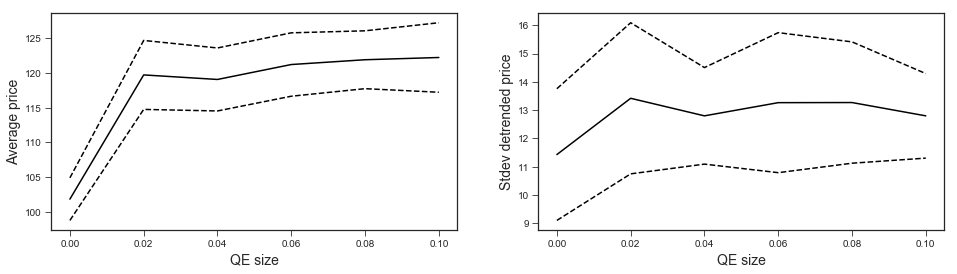

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,4])

ax1.plot(qe_size, p_averages, 'k')
ax1.plot(qe_size, p_conf_uppers, 'k--')
ax1.plot(qe_size, p_conf_lowers, 'k--')

ax1.set_ylabel('Average price', fontsize='14')

ax2.plot(qe_size, av_stdev_qe_downswing, 'k')
ax2.plot(qe_size, ns_conf_uppers, 'k--')
ax2.plot(qe_size, ns_conf_lowers, 'k--')

ax2.set_ylabel('Stdev detrended price', fontsize='14')


for ax in (ax1, ax2):
    ax.set_xlabel('QE size', fontsize='14')
    

fig.savefig('QEbust.png', dpi=200, bbox_inches = 'tight', pad_inches = 0)

# Next, QT boom